## Sales Analysis


#### Import Necessary Libraries 

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Merging 12 months data into single file
As it is easier to do yearly analysis from one data rather than analysing 12 month data

In [3]:
df= pd.read_csv('./Sales_April_2019.csv')


df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Reading all files from the directory


In [4]:
files = [file for file in os.listdir(r'./SalesAnalysis/Sales_Data')]
for file in files:
    print (file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [5]:
all_months_data = pd.DataFrame()
for file in files:
    df= pd.read_csv("./SalesAnalysis/Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data,df])
    
all_months_data.head()
    
    
    
    
     
    
        
    


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
all_months_data = pd.DataFrame()
for file in files:
    df= pd.read_csv("./SalesAnalysis/Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data,df])
    
    all_months_data.to_csv("all_data.csv", index=False)

#### Reading in Updated Dataframe 

In [7]:
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Cleaning Up the Data

##### Droping tne rows containing NaN values

In [8]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
all_data=all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Adding a 'Month' column to check the Month on Month Growth

##### For that we will run the below code:

all_data['month']=all_data['order date'].str[0:2] 
all_data['month']=all_data['month'].astype('int32') 
all_data.head()

Its giving error because some of rows doesn't have the order date, they are displaying order date as 'order date' , so we should firstly find such rows and delete them.

In [10]:
temp_df=all_data[all_data['Order Date'].str[0:2]=='Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


As you can see these are the orders which have not any defined date , that's why when we running above code it was not able to convert the month coloumn properly into the string.

So now we will update the data , focusing only on the data which have a defined date.

In [11]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']

Adding the Month column

Taking the first two character of the date coloumn and then with the help of this will make the month coloumn.

In [12]:
all_data['month']=all_data['Order Date'].str[0:2]
all_data['month']=all_data['month'].astype('int32')  #astype used to define the type of the data
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### What was the best month of the sale and how much was earned in that month?

For earnings we have to add a sales column.

For sales column, we will multiply the price and the quantity.

Firstly we will convert the columns to the correct data types.

In [13]:
#Using to_numeric to convert into numeric.
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each']) 

In [14]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [15]:
# all_data['Product'] = pd.to_numeric(all_data['Product'])
all_data.groupby('month').sum().loc[:, [ 'Sales', 'Quantity Ordered', 'Price Each']]

,Sales,Quantity Ordered,Price Each
month,,,
1,1822256.73,10903,1811768.38
2,2202022.42,13449,2188884.72
3,2807100.38,17005,2791207.83
4,3390670.24,20558,3367671.02
5,3152606.75,18667,3135125.13
6,2577802.26,15253,2562025.61
7,2647775.76,16072,2632539.56
8,2244467.88,13448,2230345.42
9,2097560.13,13109,2084992.09


### Observation from the analysis : We can clearly see that the december month was the best as the sales value is highest in that column. This can because of the festival season (Christmas).

Chart Representation

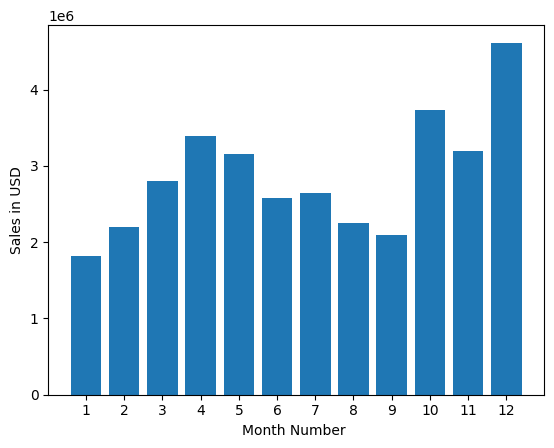

In [16]:
results=all_data.groupby('month').sum() 
months=range(1,13)
plt.bar(months,results['Sales'])  
plt.xticks(months)  # Using'xticks' to display every value for the month number in the chart 
plt.xlabel('Month Number ')
plt.ylabel('Sales in USD')
plt.show()

Now from the above chart we can analyse different things for example may be due to the chirstmas, December sales are highest.

### Which City has the highest number of sales ?

Firstly we have to add a city column (we will find the city from the address column we have).

In [17]:
all_data['City']=all_data['Purchase Address'].apply(lambda x : x.split(',')[1]) 

#lambda is used when we require a nameless function for a short period of time.
#It means that x is used for the every value in the column.
#x.split means we are now splitting the purchase column value and whatever value is at the 1st index place,
#we are assigning that value for the city column.

In [18]:
#We should make a function for this for the easy access.
def get_city(address):
    return address.split(',')[1]
all_data['City']=all_data['Purchase Address'].apply(lambda x : get_city(x)) 
all_data.head(

)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


We will going to face issues actually with the above dataset , becasue cities can be same in the different states.

So to solve that we will also include the state name along with city name.

In [19]:
def get_state(address):
    return address.split(',')[2]
all_data['City']=all_data['Purchase Address'].apply(lambda x : get_city(x)+get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001


There is postal code in the city column ,we will delete it as we don't have the requirement of the postal code.

In [20]:
def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data['City']=all_data['Purchase Address'].apply(lambda x : get_city(x)+' ' + get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


Which city has the highest number of sales ?

In [21]:
#results=all_data.groupby('City').sum()
results=all_data.groupby('City').sum().loc[:, [ 'Quantity Ordered', 'Price Each', 'month', 'Sales']]
results

,Quantity Ordered,Price Each,month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


As you can see,if we would not have included the state name along with the city we would have faced some problem as there some similar cities in the different states and countries , for example Portland ME and Portlnad OR.

### Observation from the analysis : San Francisco has the highest no. of sales data , it may be due the rich lifestyle of the San Francisco People as the cost living in this city is much higher than that of other cities .

#### Chart Representation

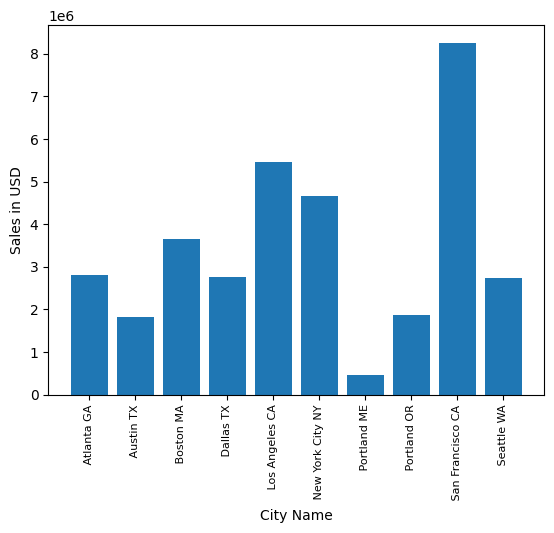

In [22]:
cities=[City for City, df in all_data.groupby('City')] 
plt.bar(cities,results['Sales']) 
plt.xticks(cities,rotation='vertical',size=8)
plt.xlabel('City Name') 
plt.ylabel('Sales in USD')
plt.show()

### What time should we display advertisements to maximize likelihood of the customer's buying product ?

We will analyse it with the help of 'Order date' column as the time of Order is also given along with the date.

But firstly we have to convert the 'Order date' column into 'Datetime' datatype.

#### Changing the data type of the 'Order Date' column to Date Time

In [23]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data.head()


C:\Users\divya\AppData\Local\Temp\ipykernel_6060\3629577627.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date']=pd.to_datetime(all_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


### Adding Hour and the Minute column.


In [24]:
all_data['Hour']=all_data['Order Date'].dt.hour #(.date.hour)
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [25]:
all_data.groupby(['Hour']).count().head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854


### Chart Representation

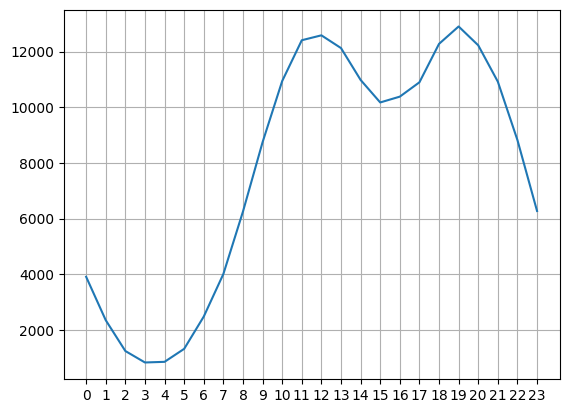

In [26]:
Hours=[Hour for Hour, df in all_data.groupby('Hour')]
plt.plot(Hours, all_data.groupby(['Hour']).count()['Quantity Ordered'])
plt.grid()
plt.xticks(Hours)
plt.show()


#### Observation from the analysis : Through the chart we can clearly see that the peak times are around 11 am and 7 pm which is making sense becasue 11AM is not too early in the morning and 7PM is not too late in the night. So the answer should be to run advertistments around 11am and 7pm to generate the peak orders.

### What are the products that are often sold together ?

How we gonna know which orders have been ordered together is by checking their 'Order ids', if two different products have the same order id that means they are ordered together.

#### Extracting the rows with same order IDs

In [27]:
df=all_data[all_data['Order ID'].duplicated( keep= False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,17,0
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco CA,17,0
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City NY,11,7
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City NY,11,7


As we can see that there are different products with the same order id now we will group the products with the same order id together

In [28]:
df=all_data[all_data['Order ID'].duplicated( keep= False)]
df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) 
#join is an in-built method used to join an iterable's elements(each elements),separated by a string separator,
#which is specified by us.
df.head()

C:\Users\divya\AppData\Local\Temp\ipykernel_6060\953035925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


Now we have grouped the products with the same order id, and now we will drop the duplicate rows.

In [29]:
df=df[['Order ID','Grouped']].drop_duplicates()
df.head()


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


### Observation from the analysis : From the above results we can analyse that those people who are purchasing Iphones are also purchasing other Apple products. So we can make some intersting combo offers for these users to sell multiple products at a time.

### Which products are sold most and what you think is the reason for that ?

In [30]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [69]:
product_group=all_data.groupby('Product')

product_group[[ 'Product','Quantity Ordered' , 'Price Each', 'month', 'Sales', 'Hour', 'Minute']].sum()





,Product,Quantity Ordered,Price Each,month,Sales,Hour,Minute
Product,,,,,,,
20in Monitor,20in Monitor20in Monitor20in Monitor20in Monit...,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,27in 4K Gaming Monitor27in 4K Gaming Monitor27...,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,27in FHD Monitor27in FHD Monitor27in FHD Monit...,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,34in Ultrawide Monitor34in Ultrawide Monitor34...,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),AA Batteries (4-pack)AA Batteries (4-pack)AA B...,27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),AAA Batteries (4-pack)AAA Batteries (4-pack)AA...,31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,Apple Airpods HeadphonesApple Airpods Headphon...,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,Bose SoundSport HeadphonesBose SoundSport Head...,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,Flatscreen TVFlatscreen TVFlatscreen TVFlatscr...,4819,1440000.00,34224,1445700.00,68815,142789


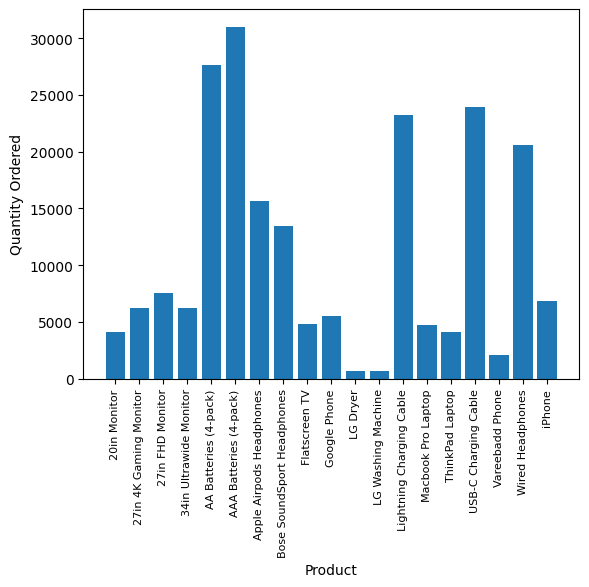

In [70]:
quantity_ordered = product_group['Quantity Ordered'].sum()
products=[product for product , df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products,rotation='vertical',size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()


## Observation from the analysis: From the chart we can clearly see that the AAA Batteries are sold the most and also we can observe that the items which are cheap are sold the most .


### We can check the no.of items sold as compare to their prices by overlaping 'Product Vs Quantity Ordered' chart with the ' Product Vs Prices of the products' chart .

In [74]:
prices=all_data.groupby('Product')['Price Each'].mean()
print (prices )

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


Now we will add a second y axis in the upper graph How to do that, (searched from Google) below is the written code for that ' fig, ax1 = plt.subplots()

ax2 = ax1.twinx() ax1.plot(x, y1, 'g-') ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data') ax1.set_ylabel('Y1 data', color='g') ax2.set_ylabel('Y2 data', color='b')

plt.show() '

C:\Users\divya\AppData\Local\Temp\ipykernel_6060\2967488994.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


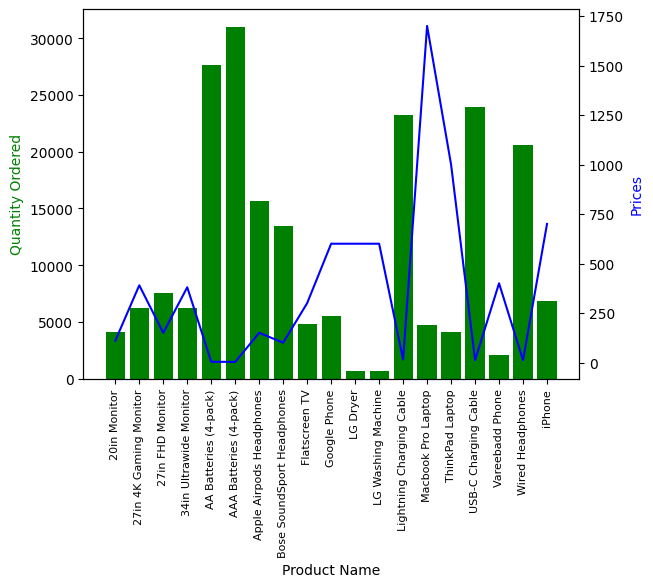

In [76]:
prices=all_data.groupby('Product')['Price Each'].mean()

fig, ax1=plt.subplots()


ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices', color='b')

ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()

### Observation : From the above chart we can say that our assumption was somewhat correct because where the green graph is high (means where the quantity of the product sold is high), there the blue graph (price of the product) is low and vice versa. But some products like 'Macbook pro' are sold in a good quantity even it is a high priced product, this can be because Macbook is used by students, professionals, artists (large no of people use this product).


## Results :

#### Best Month for the sale : December ( Due to festive season (Christmas) )
#### Best City for the sale : San Francisco (Due the rich lifestyle of the San Francisco People)
#### Best time to run Advertisments: 11 AM and 7 PM ( Due to peak orders at that time)
#### Products Often Sold Together : People Buying I phones are odering Lighting cables as well and People buying Google phones are buying Type-C cables along with that ( So we can increase our sales by offering some good combo offers according to the result )
#### Products sold the most : Products with are cheap in price are sold the most ( Verified by overlapping 'Product Vs Quantity Ordered' chart with the ' Product Vs Prices of the products' chart )